# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций

Булгаков А.Е. 13.03.25

## Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$.

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные.**
- Задача рассматривается при следующих значениях параметров: $h_{start} = 1 m$,
  $h_{end} = 3 m$, $T = 3 s$, $s_{end} = 5 m$.
- Угол запуска $\alpha$ тела не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t=0$.
- Значение массы тела $m$ не повлияет на функции перемещения тела.

### Этап 1. Импортирование модулей

In [198]:
import math

In [200]:
math.sin(math.pi/2)

1.0

In [202]:
import numpy as np

In [204]:
import matplotlib.pyplot as plt


In [206]:
import scipy.constants as const


In [208]:
import sympy

### Этап 2. Создание переменных

In [211]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

In [213]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [215]:
print(h_start, h_end)

1 3.0


In [217]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

Примеры констант: 

In [220]:
const.G

6.6743e-11

In [222]:
const.e

1.602176634e-19

In [224]:
const.pi

3.141592653589793

In [226]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)

In [228]:
#?range

In [230]:
#?np.arange

**Спецификация функции range**

Range (диапазон) представляет собой последовательность целых чисел.
На входе фнукция принимает минимум 1 обязательный аргумент. Range(start, stop[, step]), здесь start - начало диапазона, stop - конец диапазона, step - шаг перечисления.

Важно помнить, что по умолчанию последовательность чисел начинается с нуля!

In [244]:
?range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     

In [256]:
range(0,100,2)

range(0, 100, 2)

**Спецификация функции np.arange**

Нужно установить библиотеку Python NumPy, прежде чем практиковать примеры этого руководства. Возвращает массив NumPy, который занимает память для хранения всех элементов последовательности. Может работать с числами с плавающей точкой.

In [246]:
 np.arange(0,T,step)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [248]:
 np.arange(0,4,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

### Этап 3. Определение функции перемещения и нахождение угла запуска тела

Полагаем, что начало прямоугольной декартовой системы координат соответствует
уровню земли. Тогда в начальный момент движения $t=0$ тела имеем, что $$s_{x}=0, s_{y}=h_{start}.$$ Для построения функции перемещения $(s_{x}(t),s_{y}(t))$ воспользуемся вторым законом Ньютона $$m{\bf a}={\bf F}$$ где $m$ — масса тела, ускорение движения тела ${\bf a}=(s_{x}^{n}(t),s_{y}^{n}(t))$ и приложенная сила ${\bf F}=m(0,-g).$ В результате имеем два уравнения, что $$s_{x}^{n}(t)=0,  s_{y}^{n}(t)=-g$$ На основании уравнений с учетом начальных условий можно записать
аналитический вид для функций $s_{x}(t)$ и $s_{y}(t)$ $$s_{x}(t)=s_{x}(0)+v0_{x}t=0+v0_{x}t,$$ $$s_{y}(t)=s_{y}(0)+v0_{y}t-gt^{2}/2=h_{start}+v0_{y}t-gt^{2}/2 ,$$ где ${\bf v0}=(v0_{x},v0_{y})$ обозначает неизвестную скорость движения тела в начальный момент времени $t=0$.

Аналитический вид функции перемещения $(s_{x}(t),s_{y}(t))$ получен из второго закона Ньютона и начальных условий. Из второго закона Ньютона сила равна произведению массы на ускорение $\textbf{F}=m(0,-g)$, где ускорение - вторая производная $(s_{x}(t),s_{y}(t))$. Получаем два уравнения: 

$$s^"_{x}(t)=0, s^"_{y}(t)=-g$$

Учитывая начальное горизонтальное положение, при $t=0$ равное нулю, а также из-за того, что вторая производная горизонтального перемещения равна нулю, получаем линейное уравнение

$$s_{x}(t)=s_{x}(0)+v0_{x}(t)=0+v0_{x}(t)$$

Уравнение вертикального перемещения составляем учитывая начальное вертикальное положение $s_{y}(0)=h_{start}$ и зависимость расстояния от времени, представленное квадратным уравнением, учитывая силу тяжести

$$s_{y}(t)=s_{y}(0)+v0_{y}(t)-\frac g2t^2=h_{start}+v0_{y}(t)-\frac g2t^2$$


In [47]:
v0_x = s_end/T
v0_x

1.6666666666666667

In [49]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

In [51]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [53]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [55]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

### Этап 4. Построение графика траектории движения тела

In [58]:
t_list, t_array; # символ ; в конце выражения предотвращает вывод результата вып

In [60]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

In [62]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

(0.0, 5.0, 0.0, 14.0)

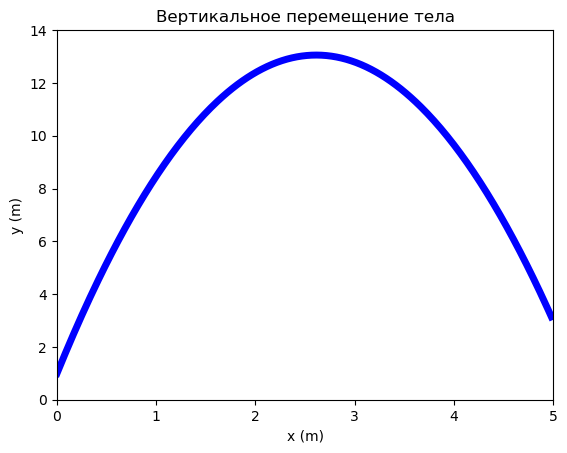

In [64]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

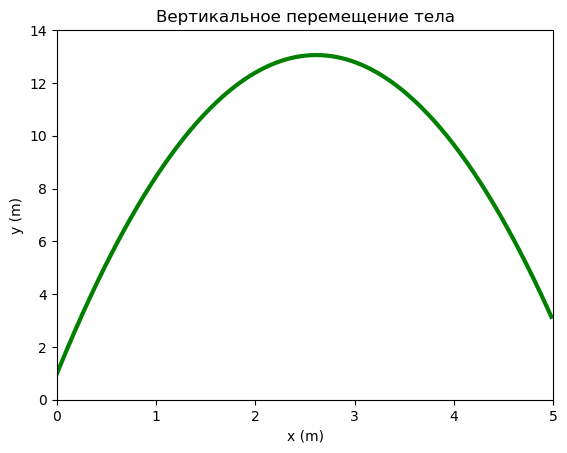

In [65]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

## Задание 1.2. Определение момента времени касания телом земли

Для задачи о падении тела из Задания 1.1  $\color{red} {найдите}$ момент времени касания телом земли (время нахождения тела в воздухе). Выполнение задания осуществите двумя способами.

1. **Точное решение** задания: найдите время касания телом земли из решения квадратного уравнения $ s_t(t) = 0$
2. **Приближенное решения задания**:
* Постройте последовательность $s_y$ на временном отрезке $[0, t_{stop}]$, чтобы момент касания тела земли $t^*$ попадал в выбранный отрезок  $t^* \in [0, t_{stop}] $. Отметим, что $ t_{stop} > T$, где значение $T$ задаётся в Задании 1.1.
* Найдите в построенной плоскости последовательности $s_y$ два соседних элемента последовательности, значения которых меняют знак. Т.е. найдите значение индекса $k$, для которого $s_y[k]s_y[k+1]<0$. Это будет означать, что 0 $ \in s_y[k]s_y[k+1]$
* Осуществите линейную интерполяцию $s_{lin}(t)$ функции $s_y(t)$ по двум точкам $(t[k],s_y[k])$ и $(t[k+1],s_y[k+1])$ для нахождения времени $t$*$\in (t[k],t[k+1])$ из условия $s_{lin}(t$*$)=0$. Другими словами, по координатам двух точек необходимо построить прямую и найти на этой прямой значение $t$* , соответствующее точке $(t$*$,0)$. 


### Подход 1(Точное решение)

In [72]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [73]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

**Спецификация функции  symbols из модуля sympy**

Функция symbols возвращает последовательность символов с взятыми именами.
из аргумента names, который может быть разделен запятой или пробелом
строка или последовательность строк.

In [77]:
sympy.symbols('x')

x

In [79]:
sympy.symbols('x:5')

(x0, x1, x2, x3, x4)

**Спецификация функции  solve из модуля sympy**

sympy.solve(f, *symbols) решает уравнение f  относительно переменной symbol

In [82]:
x = sympy.symbols('x')

In [84]:
sympy.solve(x - 3, x)

[3]

In [268]:
y = sympy.symbols('y')

In [274]:
sympy.solve(y**2 - 4,y)

[-2, 2]

### Подход 2(Приближенное решение)

In [87]:
t_stop = 5
t_array = np.arange(0,t_stop,0.01)
s_y = h_start+v0_y*t_array-g*t_array**2/2
s_y;

In [89]:
i = 0
while s_y[i]*s_y[i+1]>0:
    i+=1
print(i)

319


In [91]:
t_res = -s_y[i]*(t_array[i+1]-t_array[i])/(s_y[i+1]-s_y[i])+t_array[i]
t_res

3.199699499540028

я использовала формулу:
$$\frac{y-y_2}{y_1-y_2} = \frac{t-t_2}{t_1-t_2} $$

$$ t = \frac{-s_y[i]}{s_y[i+1]-s_y[i]}(t_{array[i+1]}-t_array[i]) + t_array[i] $$

Погрешность:

In [94]:
print(abs(t_res-t_star_exact))

8.93139179503066e-7


## Задание 1.3. Построение секущей, касательной и нормали к графику функции

$\color{red} {Постройте}$ в одной графической области

* график траектории движения тела $(s_x(t),s_y(t))$ для $ t \in [0,T]$ из Задания 1.1;
* график секущей прямой к траектории движения тела, проходящей через начальную $t=0$ и конечную точку при $t=T$;
* график касательной прямой к траектории движения тела в начальной точке при $t=0$; 
* график нормальной прямой к траектории движения тела в начальной точке
при $t=0$.

Подготовим необходимые данные для построения секущей прямой к траектории движения тела.

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной точки $p_{start}$ лежащей на прямой, и заданногго направляющего вектора $a$ $$ p(t) = p_{start} + at$$ Направляющий вектор можно определить как $a = p_{end}-p_{start}$ где точка p_end лежит на прямой и отлична от точки $p_{start}$

Введем новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$ через их координаты. Для новых переменных используем тип массив ( `ndarray` ) из `numpy`. Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с координатами.

In [102]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:


In [105]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:

In [108]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:

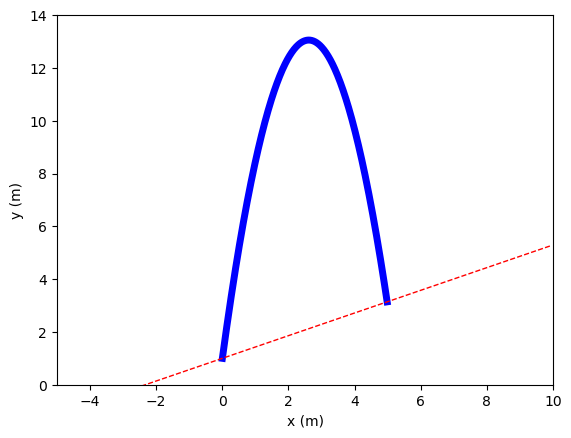

In [113]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);


$\color{red} {Постройте}$ график касательной прямой к траектории движения
тела в одной графической области с траекторией движения и секущей прямой. Для
построения касательной прямой воспользуйтесь уравнением прямой по точке $p_{start}(x_{start},y_{start})$ и угловому коэффициенту $k$: $$y=k(x-x_{start})+y_{start}.$$

In [116]:
x_st = -10.
x_kon = 70.
x_put = np.arange(x_st, x_kon, 40)
y_0 = p_start[1] #берем х0 и у0 из p_start 
x_0 = p_start[0]

In [118]:
print(x_put)

[-10.  30.]


Определяем угловой коэффициент с помощью $math.tan(alpha)$, где $alpha$ - это угол между касательной и осью Ох.

In [121]:
y_put = np.array(math.tan(alpha)*(x_put-x_0)+y_0)

$\color{red} {красная}$ - секущая прямая, $\color{green} {зелёная}$ - касательная.

(-10.0, 15.0, 0.0, 18.0)

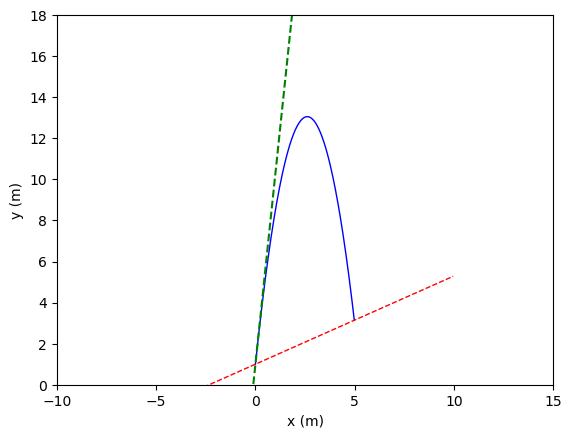

In [124]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=1)
plt.plot(x_put,y_put,'--',color='green')
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-10, s_end+10, 0, h_end+15])

$\color{red} {Сформулируйте}$ в документе уравнение нормальной прямой к
траектории движения тела в момент времени $t=0$ , используя свойство
перпендикуляртности каксательной и нормальной прямых.


(-10.0, 15.0, 0.0, 18.0)

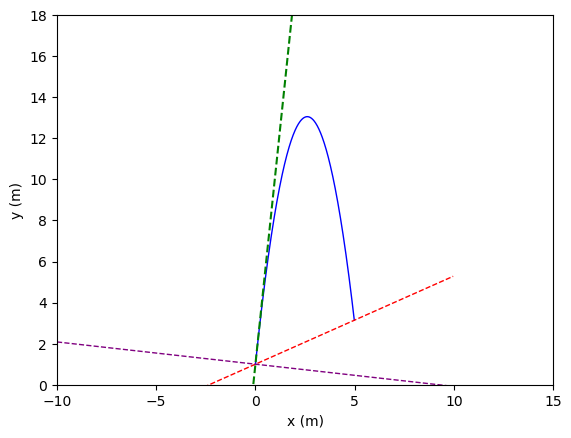

In [174]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=1)
plt.plot(x_put,y_put,'--',color='green')
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(x_put,p_start[1]-(x_put-p_start[0])/k,'--',color='purple',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-10, s_end+10, 0, h_end+15])

9.225985000000003


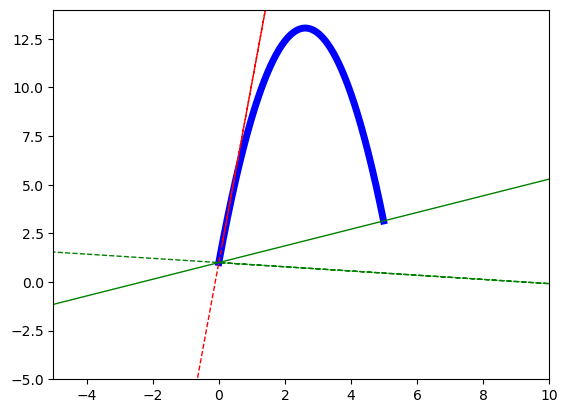

In [168]:
k=math.tan(alpha)
print(k)
p_start = np.array([s_x_array[0],s_y_array[0]])

fig = plt.figure()
plt.xlim(-5,10)
plt.ylim(-5,14)
plt.plot(s_x_array,s_y_array,'b-',lw=5)
x5=np.array([-10, 10, 0.1])
y5=np.array(k*(x5-p_start[0])+p_start[1])
yl=p_start[1]-(x5-p_start[0])/k
plt.plot(x5,y5,'--',color='red',lw=1)

plt.plot(x5,yl,'--',color='green',lw=1)

plt.plot(p[:,0],p[:,1],color='green',lw=1)

$\color{red} {красная}$ - секущая прямая, $\color{green} {зелёная}$ - касательная, $\color{purple} {фиолетовая}$ прямая - нормаль.

## Задание 1.4. Построение графиков функций

$\color {red} {Постройте}$ графики функций на плоскости по координатам точек согласну варианту. Функция задана:

а) полярным уравнением $\rho = \rho(\varphi)$ в полярной системе координат $(\varphi,\rho)$

б) параметрическими уравнениями $x=x(t),y=y(t)$ в декартовой системе коордиант $(x,y)$

### Пример

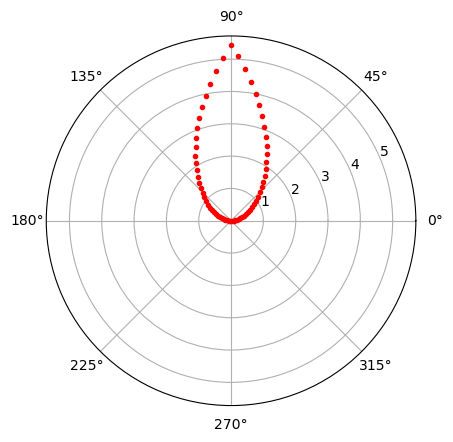

In [134]:
plt.figure()
# установка способа отображения осей
plt.axes(projection='polar')
# подготовка данных
phi = np.arange(-np.pi/2, np.pi/2, 0.05)
r = phi**3+phi
# построение графика
plt.plot(phi + (r<0)*np.pi,abs(r),'r.');

### 2 Вариант

a)Роза $\rho = \alpha sin(\frac{m}{n}\varphi),\alpha \in R, m,n$ $-$ натуральные нечётные, $m \neq n$

б) $ x = \sqrt[]{1-t^2} $, $y = tan \sqrt[]{1+t}$

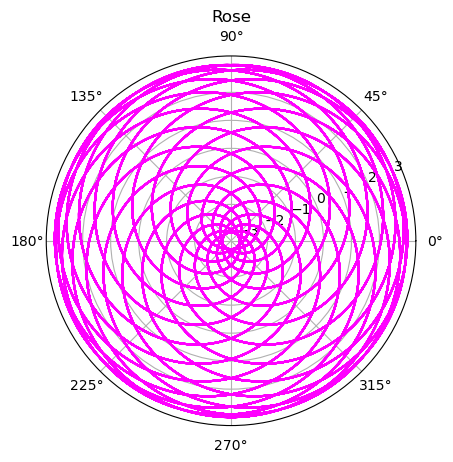

In [ ]:
plt.figure()
plt.axes(projection='polar')
a = 3
phi = np.arange(0*np.pi, 400*np.pi, 0.004)
m = 11
n = 25
r = a*np.sin((m/n)*phi)
plt.title('Rose')
plt.plot(phi,r,color='magenta')

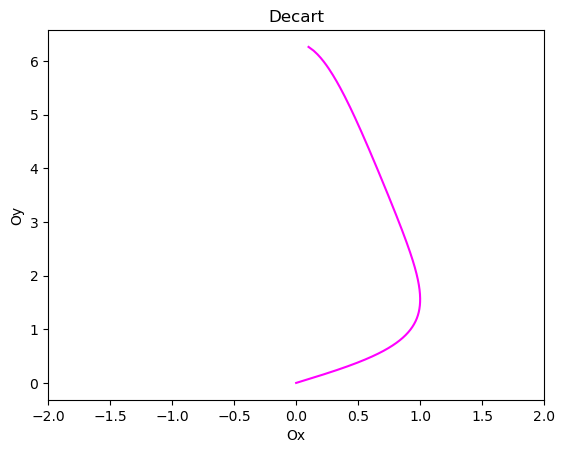

In [ ]:
plt.figure()
plt.axes(projection=None)
t = np.arange(-1,1,0.005)
x = np.sqrt(1-t**2)
y = np.tan(np.sqrt(1+t))
plt.title('Decart')
plt.xlabel('Ox')
plt.ylabel('Oy')
plt.xlim(-2, 2)
plt.plot(x,y,'Magenta')